In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [4]:
from sklearn import datasets
import tarfile
data_home = datasets.get_data_home()
archive_path = os.path.join(data_home, 'cal_housing.tgz')
with tarfile.open(mode="r:gz", name=archive_path) as f:
     cal_housing = np.loadtxt(
         f.extractfile("CaliforniaHousing/cal_housing.data"), delimiter=","
     )
     # Columns are not in the same order compared to the previous
     # URL resource on lib.stat.cmu.edu
     columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
     cal_housing = cal_housing[:, columns_index]
       
feature_names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
]

target, data = cal_housing[:, 0], cal_housing[:, 1:]

# avg rooms = total rooms / households
data[:, 2] /= data[:, 5]

# avg bed rooms = total bed rooms / households
data[:, 3] /= data[:, 5]

# avg occupancy = population / households
data[:, 5] = data[:, 4] / data[:, 5]

# target in units of 100,000
target = target / 100000.0


In [5]:
# print(housing.data[0:5])
import pprint

pprint.pprint(data[0:5])
pprint.pprint(target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [6]:
from sklearn.model_selection import train_test_split

#拆分训练集和测试集，random_state是随机种子,同样的随机数种子，是为了得到同样的随机值
x_train_all, x_test, y_train_all, y_test = train_test_split(
    data, target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
# 训练集
print(x_train.shape, y_train.shape)
# 验证集
print(x_valid.shape, y_valid.shape)
# 测试集
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [9]:
#看特征数目
x_train_scaled.shape[1:]

(8,)

In [10]:
x_train_scaled[1] #标准化后的值看一下

array([-0.29807281,  0.35226166, -0.10920508, -0.25055521, -0.03406402,
       -0.006034  ,  1.08055484, -1.06113817])

In [11]:
#回归模型我们只需要1个数
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),#结果层只有1个节点
])
model.summary()
#mean_squared_error是均方差
model.compile(loss="mean_squared_error", optimizer="sgd")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0489 - val_loss: 0.6647
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.4876
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4421 - val_loss: 0.4535
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4202 - val_loss: 0.4274
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4108 - val_loss: 0.4182
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3982 - val_loss: 0.4144
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3935 - val_loss: 0.4084
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3876 - val_loss: 0.4017
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3824 - val_loss: 0.4028
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3790 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3229
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3120 - val_loss: 0.3245
Epoch 83/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3169 - val_loss: 0.3259
Epoch 84/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3092 - val_loss: 0.3244
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3202 - val_loss: 0.3179
Epoch 86/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3095 - val_loss: 0.3427
Epoch 87/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3109 - val_loss: 0.3152
Epoch 88/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3139 - val_loss: 0.3211
Epoch 89/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3086 - val_loss: 0.3204
Epoch 90/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3076 - val_loss: 

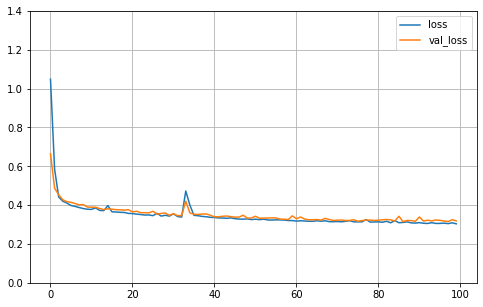

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.4)
    plt.show()
plot_learning_curves(history)

In [15]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.3261290192604065

In [16]:
np.tanh(-1000)

-1.0